# emotion-classifier 0.1

In [1]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
!unzip "gdrive/MyDrive/datasets/challenges-in-representation-learning-facial-expression-recognition-challenge.zip" -d 'datasets'

Archive:  gdrive/MyDrive/datasets/challenges-in-representation-learning-facial-expression-recognition-challenge.zip
  inflating: datasets/example_submission.csv  
  inflating: datasets/fer2013.tar.gz  
  inflating: datasets/icml_face_data.csv  
  inflating: datasets/test.csv       
  inflating: datasets/train.csv      


In [3]:
import pandas as pd
import numpy as np
import os

root_dir = '/content/datasets/'
full_data_file_name = 'icml_face_data.csv'
train_data_file_name = 'train.csv'
test_data_file_name = 'test.csv'

def show_scv_head(path: str) -> None:
  df = pd.read_csv(path)
  print(path, df.head(), '\n', sep='\n')


show_scv_head(root_dir + full_data_file_name)
show_scv_head(root_dir + train_data_file_name)
show_scv_head(root_dir + test_data_file_name)


/content/datasets/icml_face_data.csv
   emotion     Usage                                             pixels
0        0  Training  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  Training  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  Training  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  Training  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  Training  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


/content/datasets/train.csv
   emotion                                             pixels
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


/content/datasets/test.csv
                                              pixels
0  254 254 254 254 254 249 255 160 2 58 53 70 7

In [4]:
df = pd.read_csv(root_dir + full_data_file_name)
df.columns = ('emotion', 'usage', 'pixels')

df['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [5]:
df['usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: usage, dtype: int64

In [6]:
emotions = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Suprise',
    6: 'Neutral'
}

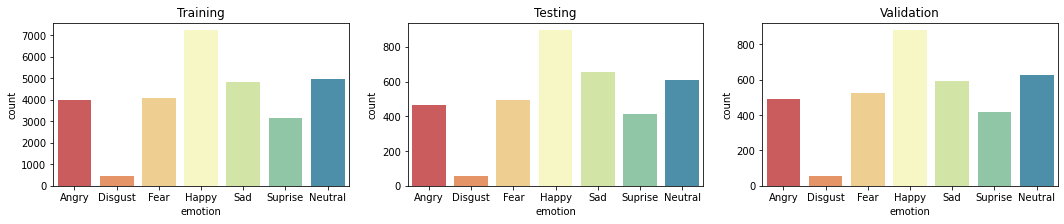

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

subcategories = {
    'Training': 'Training',
    'PublicTest': 'Testing',
    'PrivateTest': 'Validation'
}

fig, ax = plt.subplots(1, 3, figsize=(18, 3))

for i, item in enumerate(subcategories.items()):
  sns.countplot(data=df[df['usage'] == item[0]], x='emotion', ax=ax[i], palette='Spectral').set_title(item[1])
  ax[i].set_xticklabels(emotions.values())


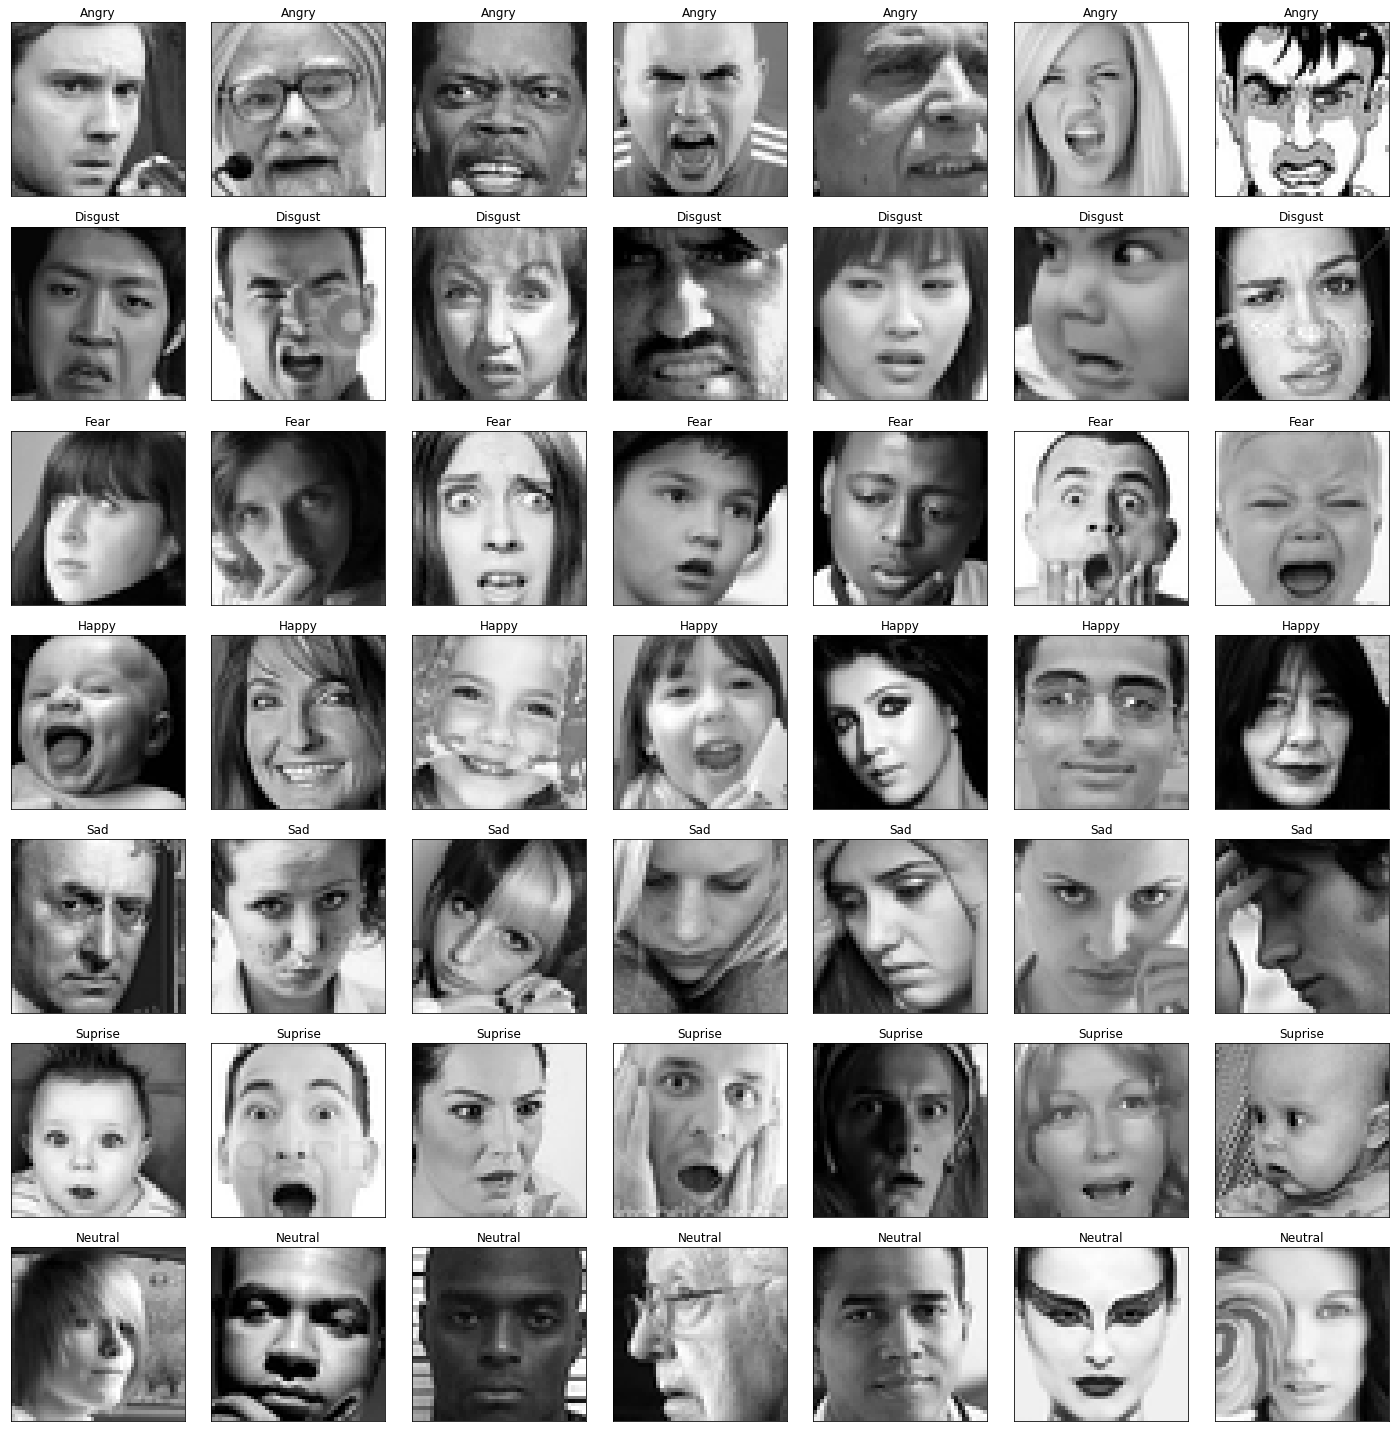

In [8]:
fig = plt.figure(1, (20, 20))
k = 0

for label in sorted(df['emotion'].unique()):
  for j in range(len(emotions)):
    px = df[df['emotion'] == label].pixels.iloc[k]
    px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
    k+=1
    ax = plt.subplot(7, 7, k)
    ax.imshow(px, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(emotions[label])
    plt.tight_layout()



In [9]:
train_data = df[df['usage'] == 'Training']
train_data.drop(columns='usage', inplace=True)
train_data.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [10]:
type(train_data)

pandas.core.frame.DataFrame

In [11]:
from typing import Tuple

def prepare_data(data: pd.core.frame.DataFrame) -> Tuple[np.array, np.array]:
  image_array = np.zeros(shape=(len(data), 48, 48, 1))
  image_label = np.array(list(map(int, data['emotion'])))

  for i, row in enumerate(data.index):
    image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
    image = np.reshape(image, (48, 48))
    image_array[i, :, :, 0] = image / 255

  return image_array, image_label


In [12]:
x_train, y_train = prepare_data(train_data)
print(x_train.shape, y_train.shape)

(28709, 48, 48, 1) (28709,)


In [13]:
test_data = df[df['usage'] !='Training']
test_data.drop(columns='usage', inplace=True)
# print(test_data.head())

x_test, y_test = prepare_data(test_data)
print(x_test.shape, y_test.shape)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(7178, 48, 48, 1) (7178,)


In [14]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  shuffle=True,
                                                  stratify=y_train,
                                                  test_size=0.2,
                                                  random_state=121)

In [15]:
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras as keras
le = LabelEncoder()

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train = keras.utils.to_categorical(y_train)

#ecode test labels
y_test = le.transform(y_test)
y_test = keras.utils.to_categorical(y_test)

#ecode val labels
y_val = le.transform(y_val)
y_val = keras.utils.to_categorical(y_val)

print('y_train', y_train.shape)
print('y_test', y_test.shape)
print('y_val', y_val.shape)

y_train (22967, 7)
y_test (7178, 7)
y_val (5742, 7)


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size = 48
batch_size = 32

#use Image Data Generator to perform this task
#train set
datagen = ImageDataGenerator(rotation_range=25, 
                             width_shift_range=0.1,
                             height_shift_range=0.1, 
                             shear_range=0.2, 
                             zoom_range=0.2,
                             horizontal_flip=True)

datagen.fit(x_train)
datagen.fit(x_val)


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential()

#1st conv
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1))) #1 is for grayscale
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2nd conv
model.add(Conv2D(128, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd conv
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th conv
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [18]:
#compile
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 1e-5),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

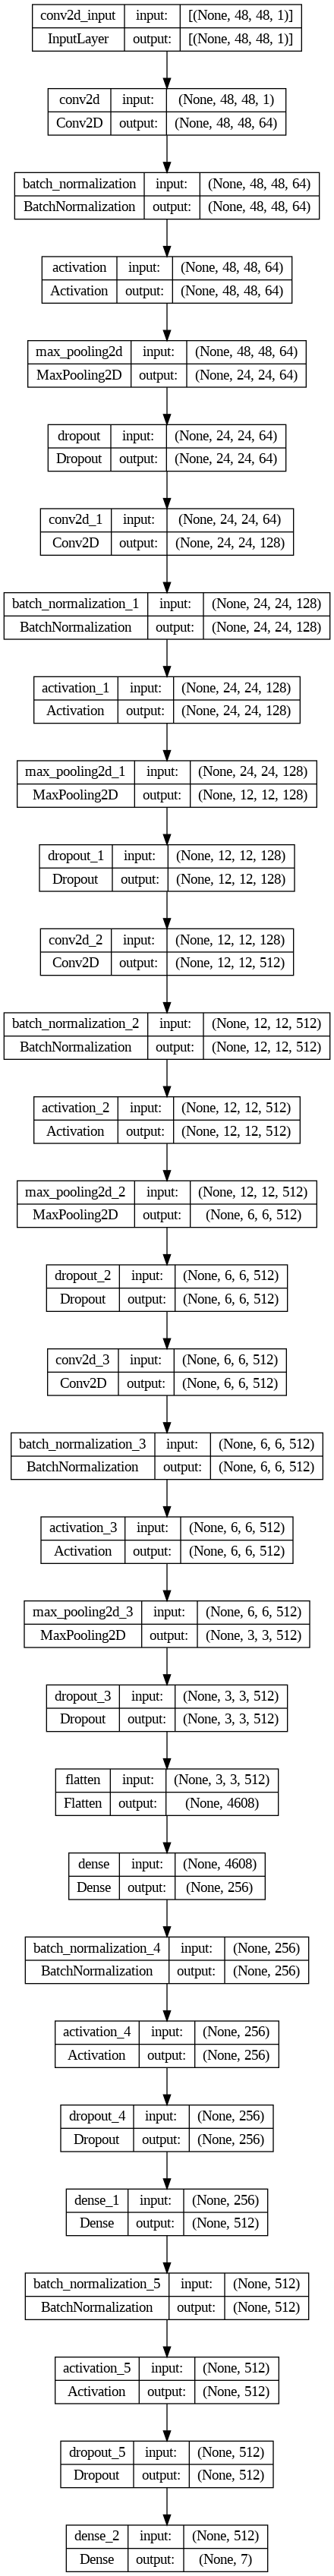

In [19]:
from tensorflow.keras.utils import plot_model
#plot
plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

In [20]:
!pip install git+https://github.com/tensorflow/docs

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
epochs = 100

#checkpoint to save best weights
checkpoint = ModelCheckpoint('model_weights.h5',
                             monitor='val_accuracy',
                             save_weights_only=True,
                             mode='max',
                             verbose=1)

#reduce learning rate if plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=2,
                              min_lr=0.00001,
                              mode='min')

#stop training if accuracy does not improve
earlystop = EarlyStopping(monitor='val_accuracy',
                          patience=5,
                          mode='max',
                          verbose=1)

#define callbacks
callbacks = [tfdocs.modeling.EpochDots(), 
             earlystop, 
             checkpoint, 
             reduce_lr]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-b7gc9ll0
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-b7gc9ll0
  Resolved https://github.com/tensorflow/docs to commit c1510dc5ad73aa829249822798e6263360b0f62a
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=180353 sha256=a3ac3a4234ffedcecfa687ecb94a2a7878dc00a05756b2aca15e730c69fee0b6
  Stored in directory: /tmp/pip-ephem-wheel-cache-6ohfze55/wheels/3b/ee/a2/ab4d36a9a4af495bcb936f3e849d4b497b65fa40548a68d6c3
Successfully built tensorflow-docs


In [21]:
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    steps_per_epoch=len(x_train) / batch_size,
                    epochs=epochs,
                    callbacks=callbacks)

Epoch 1/100
718/717 [==============================] - ETA: 0s - loss: 2.1959 - accuracy: 0.1995
Epoch: 0, accuracy:0.1995,  loss:2.1959,  val_accuracy:0.2409,  val_loss:1.8755,  
.
Epoch 1: saving model to model_weights.h5
717/717 [==============================] - 39s 24ms/step - loss: 2.1959 - accuracy: 0.1995 - val_loss: 1.8755 - val_accuracy: 0.2409 - lr: 1.0000e-05
Epoch 2/100
716/717 [============================>.] - ETA: 0s - loss: 2.0406 - accuracy: 0.2289.
Epoch 2: saving model to model_weights.h5
717/717 [==============================] - 16s 23ms/step - loss: 2.0401 - accuracy: 0.2290 - val_loss: 1.7844 - val_accuracy: 0.2679 - lr: 1.0000e-05
Epoch 3/100
716/717 [============================>.] - ETA: 0s - loss: 1.9935 - accuracy: 0.2384.
Epoch 3: saving model to model_weights.h5
717/717 [==============================] - 17s 23ms/step - loss: 1.9937 - accuracy: 0.2383 - val_loss: 1.7496 - val_accuracy: 0.2940 - lr: 1.0000e-05
Epoch 4/100
718/717 [=========================

In [22]:
model.save('model')
model.save('modelh5', save_format='h5')
# model = keras.models.load_model("model")


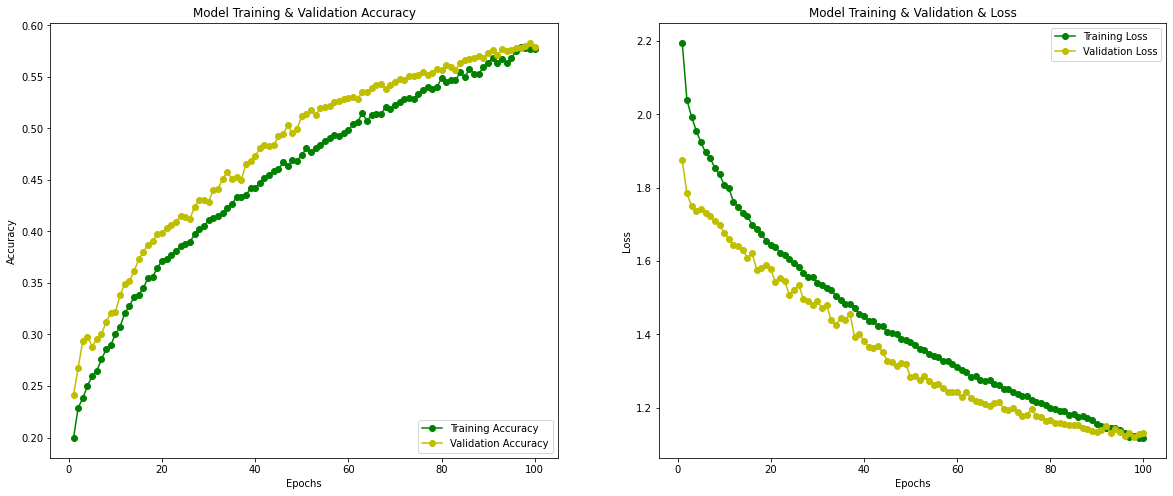

In [23]:

fig , ax = plt.subplots(1,2)
fig.set_size_inches(20, 8)

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

ax[0].plot(epochs , train_acc , 'g-o' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'y-o' , label = 'Validation Accuracy')
ax[0].set_title('Model Training & Validation Accuracy')
ax[0].legend(loc = 'lower right')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'y-o' , label = 'Validation Loss')
ax[1].set_title('Model Training & Validation & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

In [24]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_train.shape)


print('Train accuracy & loss:', model.evaluate(x_train, y_train))
print('Test accuracy & loss:', model.evaluate(x_test, y_test))

(22967, 48, 48, 1) (22967, 7)
(7178, 48, 48, 1) (22967, 7)
718/718 [==============================] - 6s 8ms/step - loss: 0.9270 - accuracy: 0.6491
Train accuracy & loss: [0.9269698858261108, 0.6490616798400879]
225/225 [==============================] - 2s 10ms/step - loss: 1.1346 - accuracy: 0.5748
Test accuracy & loss: [1.1345531940460205, 0.5748119354248047]


In [25]:
#make prediction
y_test = np.argmax(y_test, axis=1)
yhat_test = np.argmax(model.predict(x_test), axis=1)

225/225 [==============================] - 2s 7ms/step


In [26]:
from sklearn.metrics import classification_report
#get classification report
print(classification_report(y_test, yhat_test, target_names=emotions.values()))

              precision    recall  f1-score   support

       Angry       0.54      0.41      0.47       958
     Disgust       0.46      0.47      0.46       111
        Fear       0.52      0.18      0.26      1024
       Happy       0.71      0.84      0.77      1774
         Sad       0.44      0.50      0.47      1247
     Suprise       0.66      0.77      0.71       831
     Neutral       0.50      0.59      0.54      1233

    accuracy                           0.57      7178
   macro avg       0.55      0.54      0.53      7178
weighted avg       0.57      0.57      0.55      7178



1/1 [==============================] - 0s 43ms/step


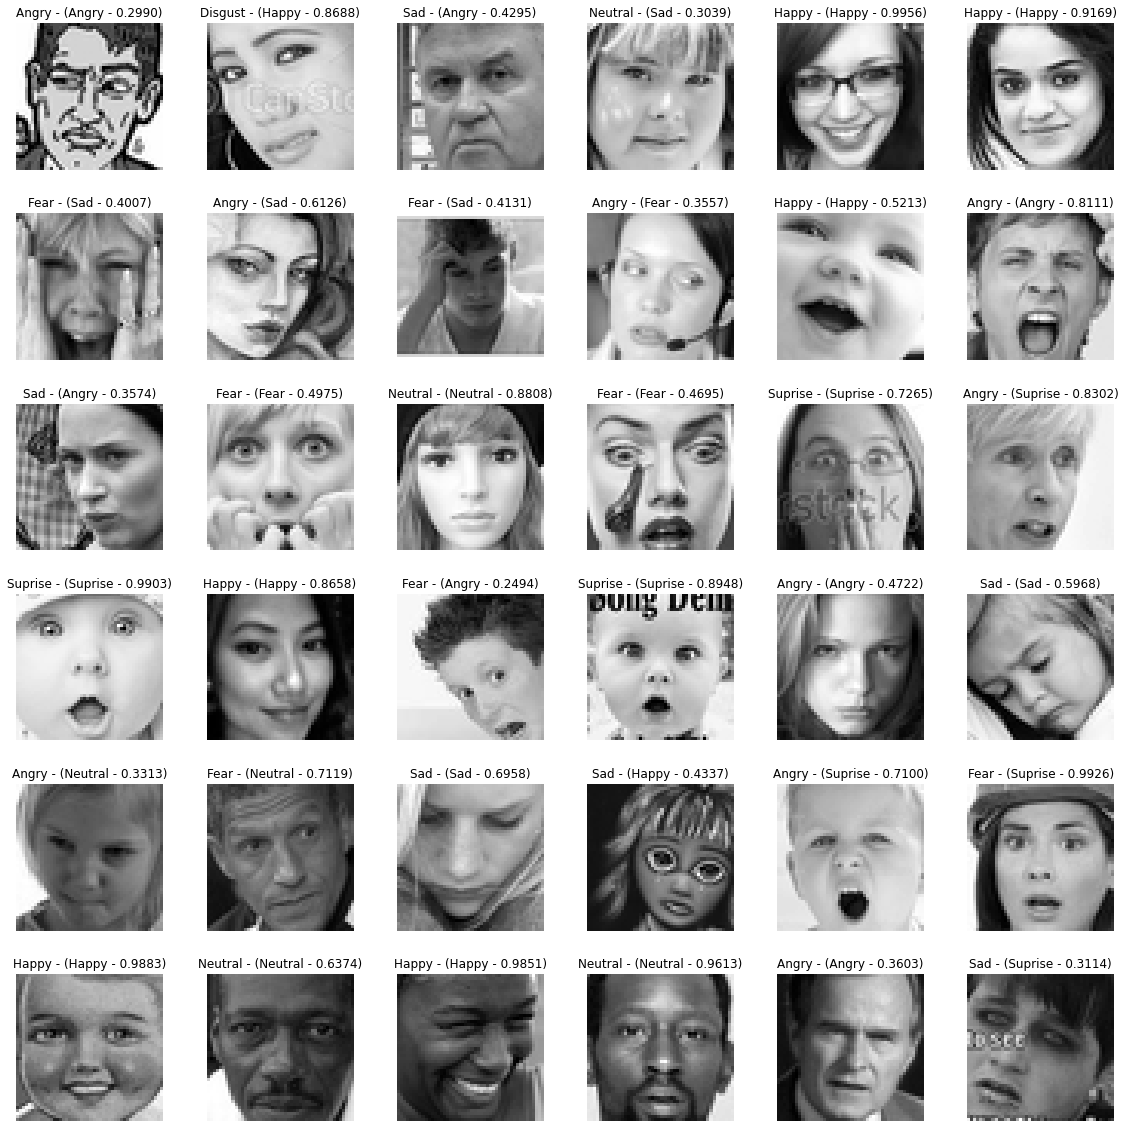

In [27]:
plt.figure(figsize=[16,16])

for i in range(36):
    img = x_test[i,:,:,0]
    p_dist = model.predict(img.reshape(1, 48, 48, 1))
    k = np.argmax(p_dist)
    p = np.max(p_dist)

    plt.subplot(6, 6, i+1)
    plt.imshow(img, cmap='binary_r')
    plt.title(f'{emotions[y_test[i]]} - ({emotions[k]} - {p:.4f})')
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [28]:
!pip install mlxtend --upgrade --no-deps

import mlxtend
                                                          
print(mlxtend.__version__) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.7 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0
0.21.0


[[ 397   27   35  114  190   40  155]
 [  20   52    3   11   11    3   11]
 [  99   12  181  111  285  179  157]
 [  32    3   15 1498   87   49   90]
 [ 104   11   55  140  628   33  276]
 [  19    2   31   62   24  644   49]
 [  65    6   27  165  218   26  726]]


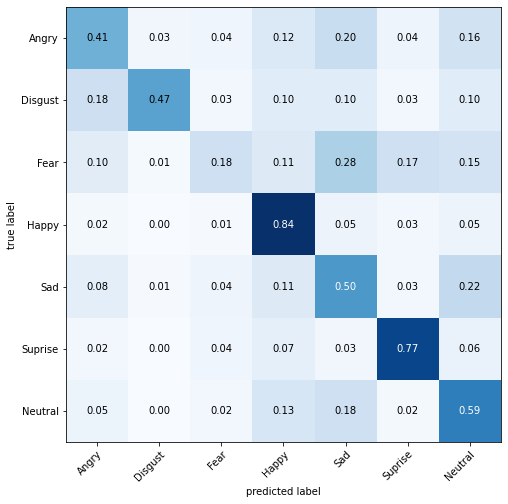

In [29]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#get confusion matrix
cm = confusion_matrix(y_test, yhat_test)
print(cm)

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()